In [123]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [124]:
results_df = pd.read_csv('auction_detailed_log.csv')
print(results_df.columns)

Index(['ItemNumber', 'ItemTime', 'BidAmount'], dtype='object')


In [125]:
results_df

,ItemNumber,ItemTime,BidAmount
0,1,1.2,872.74
1,1,1.9,916.38
2,1,3.3,962.20
3,1,4.9,1010.31
4,1,7.4,1060.83
...,...,...,...
3791,200,7.0,4184.08
3792,200,7.2,4393.29
3793,200,7.3,4612.95
3794,200,8.4,4843.60


In [126]:
# Calculate the average number of bids
aggregated_items = results_df.groupby('ItemNumber').size().reset_index(name='count')

aggregated_items.head()

,ItemNumber,count
0,1,14
1,2,14
2,3,13
3,4,19
4,5,18


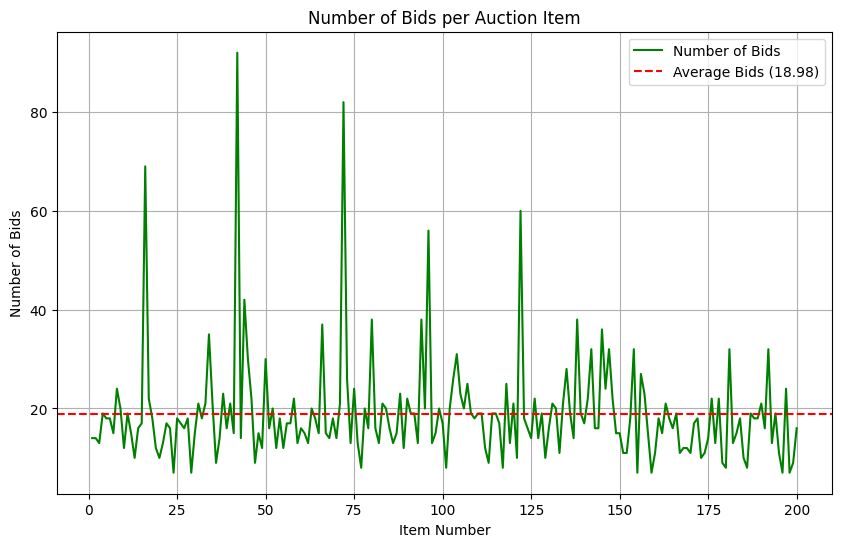

In [127]:
# Plotting the data
fig, axs = plt.subplots(1, 1, figsize=(10, 6))

# Plot the number of bids per item
axs.plot(aggregated_items['ItemNumber'], aggregated_items['count'], color="green", label='Number of Bids')

# Calculate the average number of bids
average_bids = aggregated_items['count'].mean()

# Plot the average number of bids
axs.axhline(y=average_bids, color='red', linestyle='dashed', label=f'Average Bids ({average_bids:.2f})')

# Adding labels and title
axs.set_xlabel('Item Number')
axs.set_ylabel('Number of Bids')
axs.set_title('Number of Bids per Auction Item')

# Adding grid
axs.grid(True)

# Adding legend
axs.legend()

# Display the plot
plt.show()

<Axes: xlabel='count', ylabel='Count'>

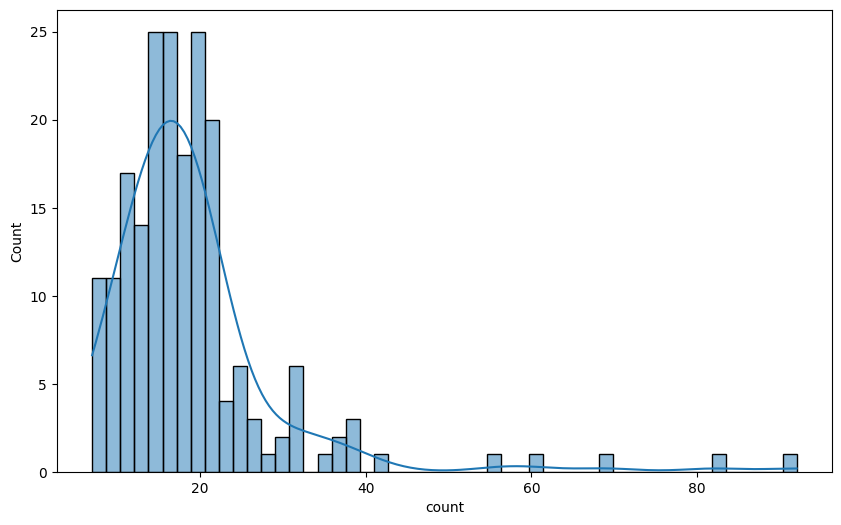

In [128]:
fig, axs = plt.subplots(1, 1, figsize=(10, 6))
sns.histplot(aggregated_items['count'], bins=50, kde=True, ax=axs)

Text(0.5, 1.0, 'Bidding Distribution Over Time')

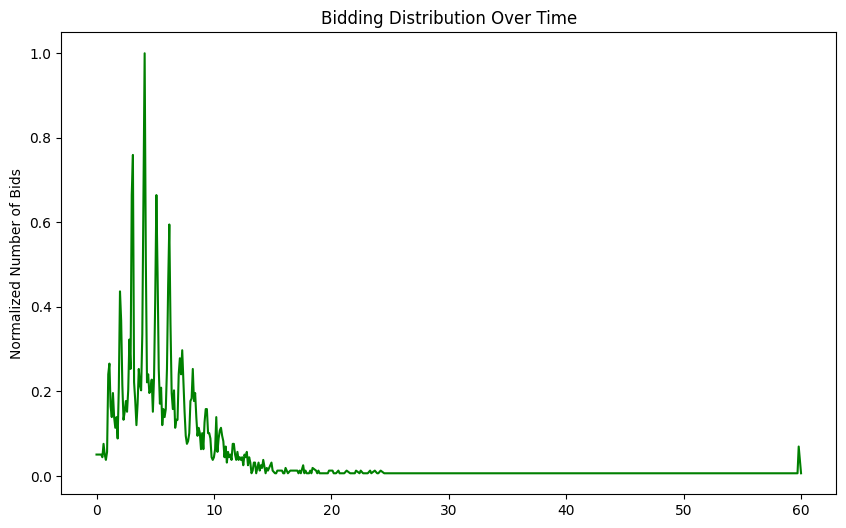

In [129]:
# Bidding distribution in the auction
fig, axs = plt.subplots(1, 1, figsize=(10, 6))

time_aggregated = results_df.groupby('ItemTime').size().reset_index(name='count')

normalizer = time_aggregated['count'].max()
time_aggregated['count'] = time_aggregated['count'] / normalizer

axs.plot(time_aggregated['ItemTime'], time_aggregated['count'], color="green", label='Number of Bids') 
axs.set_ylabel('Normalized Number of Bids')
axs.set_title('Bidding Distribution Over Time')